## Instalando e Carregando os Pacotes

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Análise Exploratória

**Importando o dataset gerado ao final da Parte 1 do Projeto 8**

In [2]:
# Carregando os dados
dados = pd.read_csv("dados/dados_parte1.csv")

In [3]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [4]:
dados.shape

(68629, 24)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

### Análise Gráfica

#### 1- Total de Medicamentos Consumidos Por Faixa Etária

> A faixa etária de pacientes entre 70-80 é a que mais consome medicamentos.

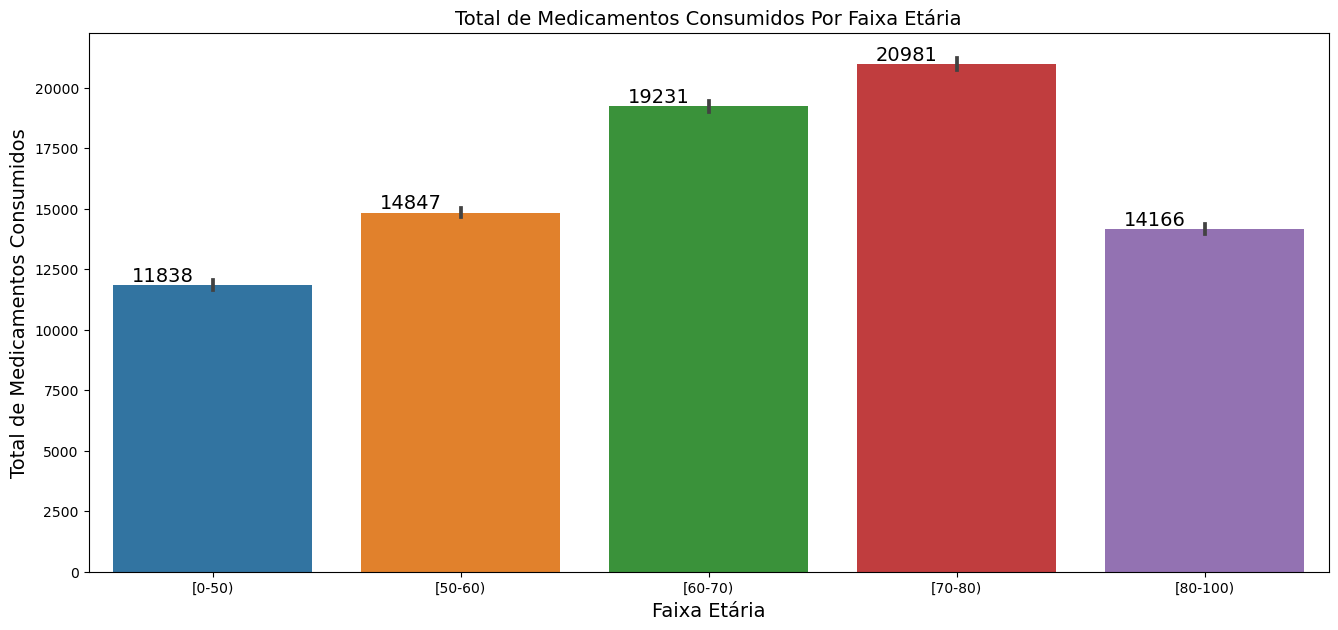

In [6]:
plt.figure(figsize = (16, 7))

# Gráfico de barras
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

# Labels
# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')
plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')
plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

# Colocando o total em cada barra como label
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

plt.show()

#### 2- Total de Readmissões de Pacientes Diabéticos Por Gênero

> Neste passo, desejamos calcular qual o sexo dos pacientes que têm o maior número de readmissões.

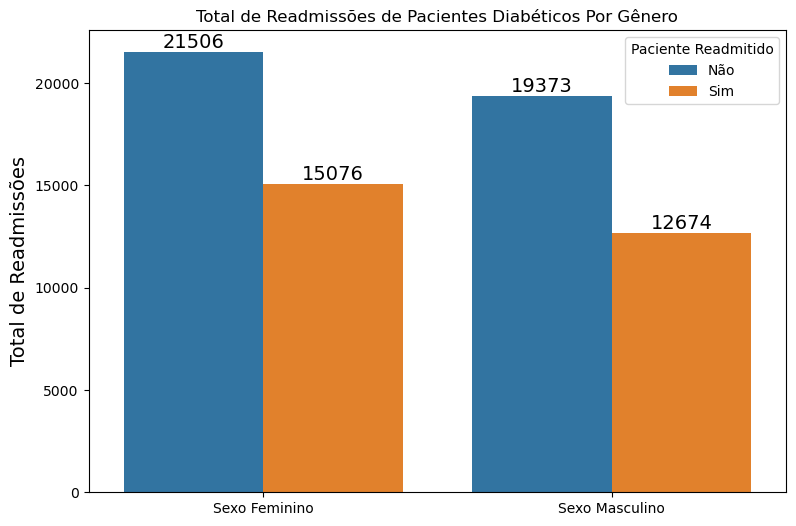

In [7]:
# Gráfico de barras com label encoding
figx = sns.countplot(x = [('Sexo Feminino' if x == 0 else 'Sexo Masculino') for x in dados['gender']], 
                     hue = 'readmitted', 
                     data = dados) 

# Tamanho da figura em polegadas
figx.figure.set_size_inches(9,6)

# Labels
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
    
plt.show()

#### 3- Total de Readmissões de Pacientes Por Faixa Etária

> Verificando qual faixa etária de pacientes tem o maior número de readmissões.

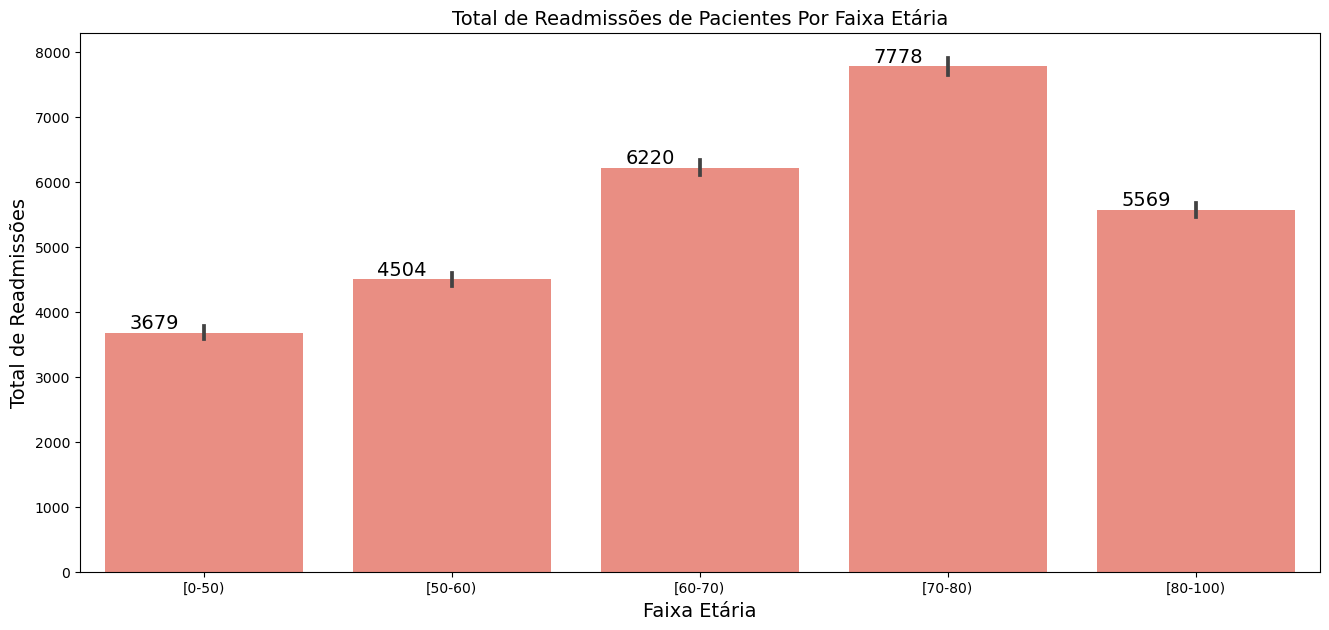

In [8]:
plt.figure(figsize = (16,7))

# Gráfico de barras 
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')

# Labels
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

# Inserindo os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

plt.show()

In [9]:
# Verificando a contagem de cada categoria
dados['readmitted'].value_counts()

0    40879
1    27750
Name: readmitted, dtype: int64

#### 4- Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

In [10]:
print('Não Readimitidos: ', (dados['readmitted'] == 0).sum() / len(dados) * 100, '%')
print('Readimitidos: ', (dados['readmitted'] == 1).sum() / len(dados) * 100, '%')

Não Readimitidos:  59.56519838552216 %
Readimitidos:  40.43480161447784 %


Criamos uma crosstable(tabela cruzada) para verificar os percentuais das faixas estárias

In [11]:
perc_idade_read = pd.crosstab(dados['age'], dados['readmitted'], margins = True, normalize = 'index') * 100
perc_idade_read

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


> Notamos que a faixa etária entre 70-80 é a que possui mais readmissões, enquanto a faixa etária de 0-50 anos tem o menor percentual.

#### 5- Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

> Devido a necessidade de construir un gráfico com 4 variáveis, usaremos o catplot()

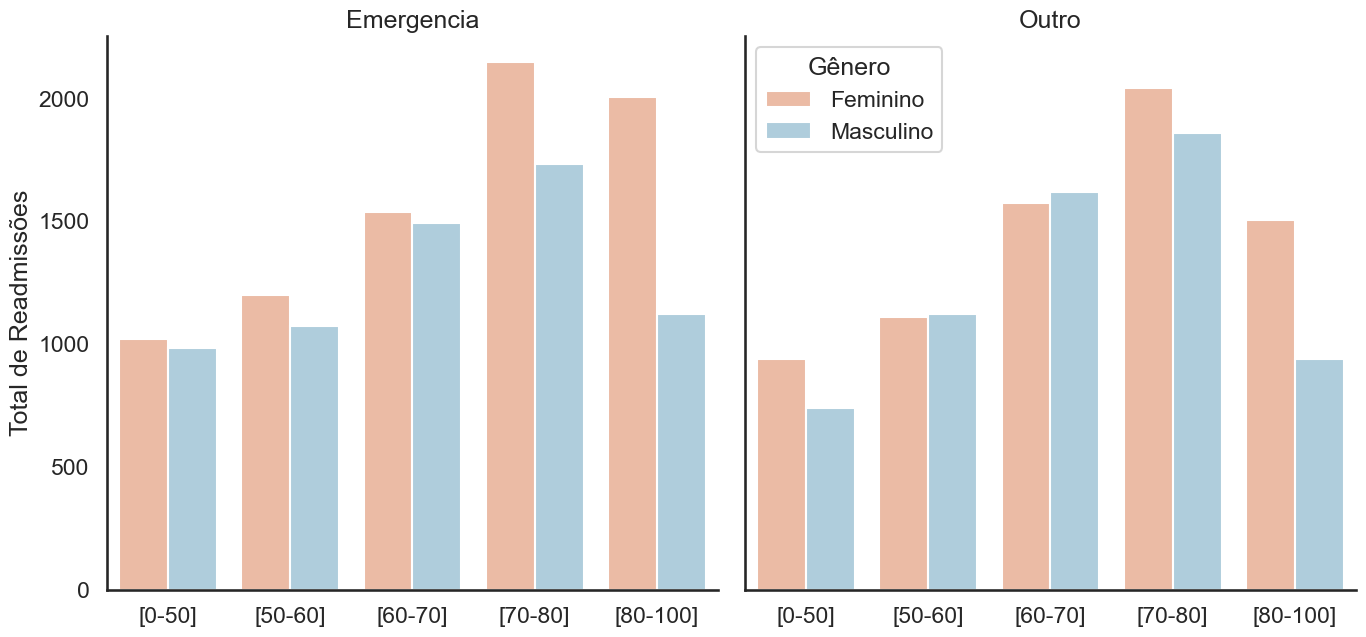

In [12]:
# Estilizando o background
sns.set(style = "white", context = "talk")

# Gráfico de barras com catplot
g = sns.catplot(x = 'age', 
                y = 'readmitted', 
                hue = 'gender', 
                col = 'admission_type_id',
                estimator = np.sum, 
                data = dados, 
                palette = "RdBu", 
                kind = "bar",
                height = 7, 
                aspect = 1,
                legend = False,
                ci = None)

# Labels
(g.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])
plt.show(g)

>**INSIGHT:** a quantidade de mulheres na faixa etária de 70-80 anos tem um número maior de readmissões por emergência.

####  6- Total de Readmissões/Não Readmissões Por Gênero e Por Raça

**Primeiro, calcularemos o número de readimissões por raça**

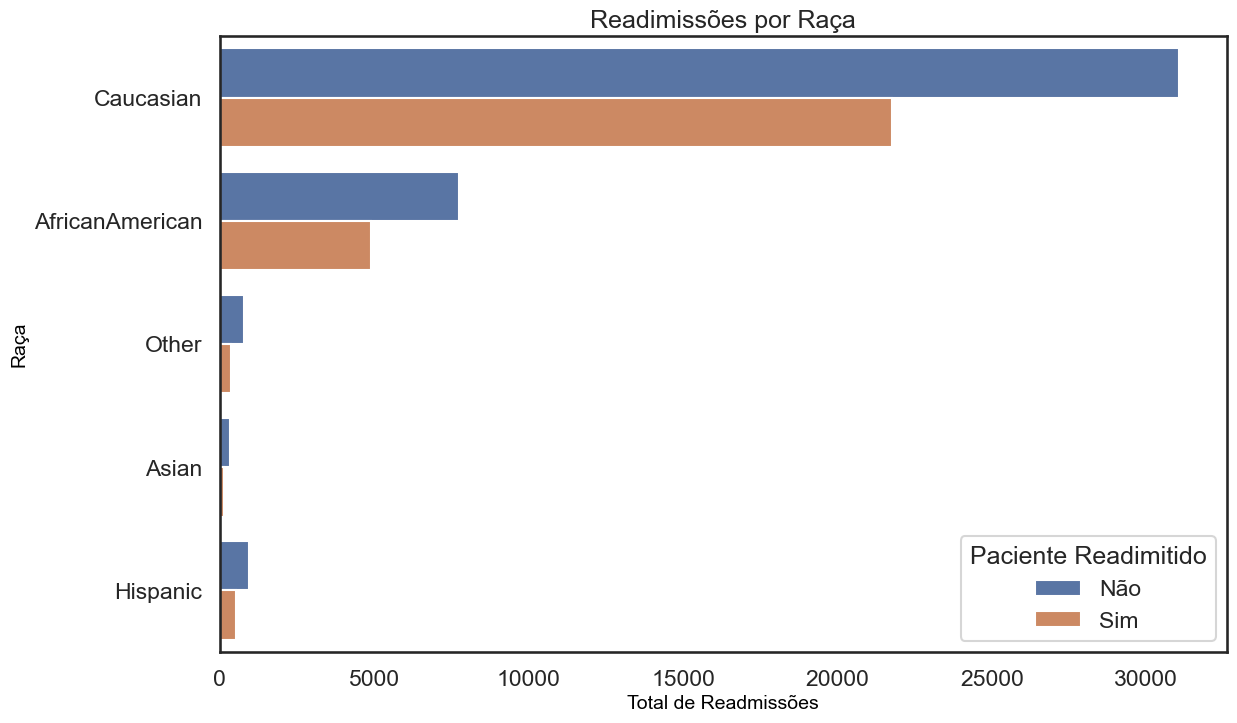

In [13]:
figx = sns.countplot(y = 'race', hue = 'readmitted', data = dados)

# Labels
plt.xlabel('Total de Readmissões', fontsize = 14, color = 'black')
plt.ylabel('Raça', fontsize = 14, color = 'black')

# Tamanho do gráfico
figx.figure.set_size_inches(13, 8)

# Legenda
figx.legend(title = 'Paciente Readimitido', labels = ('Não', 'Sim'))

# Título
figx.axes.set_title('Readimissões por Raça')

plt.show()

**Agora as readmissões por raça e gênero.**

In [14]:
# Verificando os valores únicos de raça
dados['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [15]:
# Criamos um dataframe temporário para ajustarmos o label(que está 0 e 1) do target para plotar posteriormente
df_temp = dados

In [16]:
df_temp['readmitted'] = df_temp['readmitted'].map({0: 'Não readmitido', 1: 'Readimitido'})

In [17]:
df_temp['readmitted'].head()

0       Readimitido
1    Não readmitido
2    Não readmitido
3    Não readmitido
4       Readimitido
Name: readmitted, dtype: object

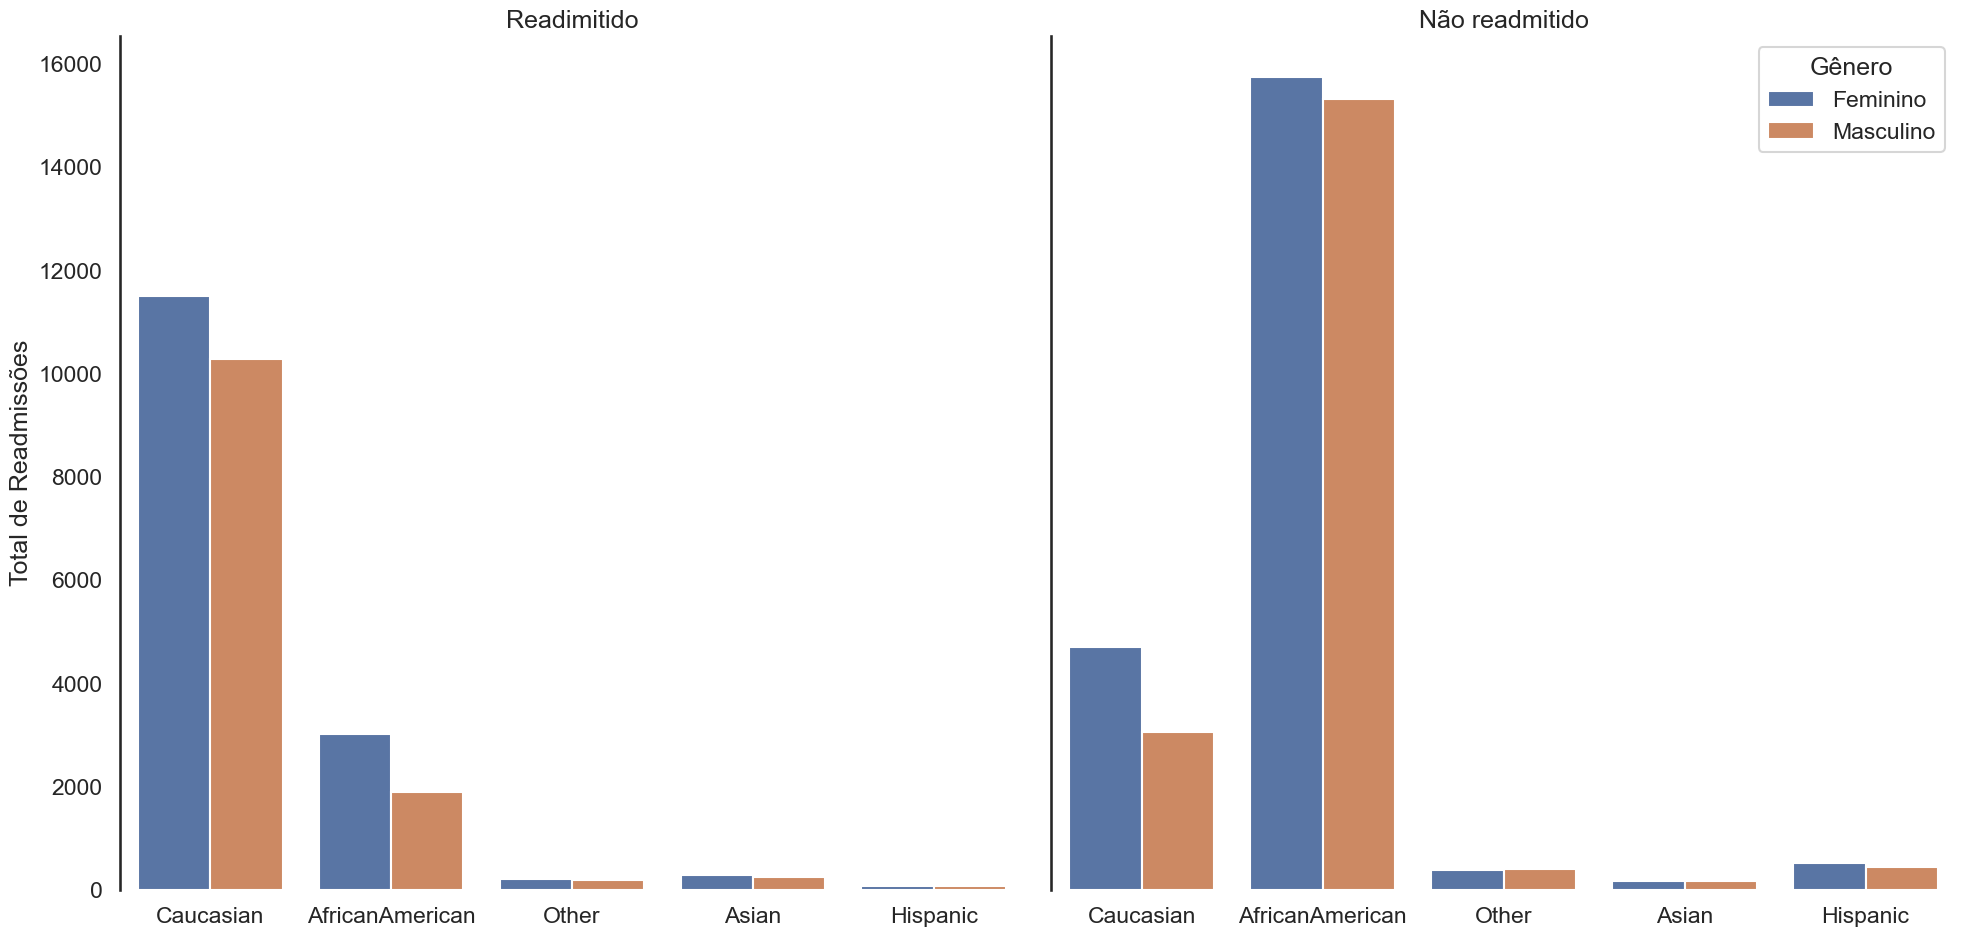

In [18]:
# Plotando

# Removendo o background
sns.set(style = "white", context = "talk")

# Função para personalizar a quantidade de parâmetro
def countplot(x, hue, **kwargs): # **kwargs é parâmetro especial que permite que você passe um número arbitrário de argumentos nomeados para uma função
    sns.countplot(x = x, hue = hue, **kwargs)

# Cria um facetgrid (usando o dataframe temporário)
# A função catplot é uma interface de alto nível que permite criar vários tipos de gráficos categóricos em uma única chamada de função. 
# Por outro lado, a classe FacetGrid é uma classe de baixo nível que oferece mais controle e flexibilidade na criação de gráficos categóricos. 
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)

# Mapeamento do facetgrid às variáveis
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')

# Labels
(fig.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])

# Remove os contornos do gráfico
sns.despine(bottom = True)

> Mulheres Caucasianas são a maioria entre as mulheres readmitidas e as não-readmitidas são também mulheres, mas afro-americanas

#### 7- Número de Visitas x Comorbidade

>Essa análise tem o objetivo de descobrir a relação entre a comorbidade x número de visitas, para isso usaremos a tabela de contingência.

In [19]:
num_visitas_comorb = pd.crosstab(dados['number_inpatient'], dados['comorbidade']).sum()
num_visitas_comorb

comorbidade
0    15483
1    13032
2    27076
3    13038
dtype: int64

**Testanto um gráfico de área**

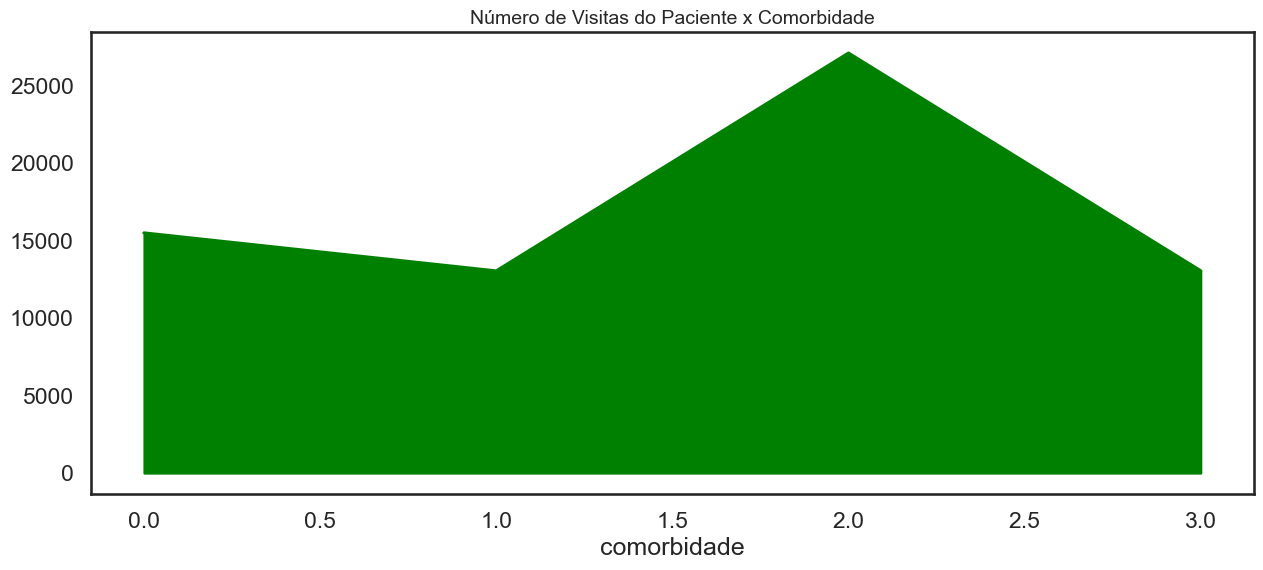

In [20]:
# Criando um gráfico de área para testar mais gráficos, apesar desse ser de difícil interpretação

# Cria o gráfico
fig = num_visitas_comorb.plot(kind = 'area',
                                   figsize = (15,6),
                                   color = 'Green')

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)
plt.show()

**Gráfico mais correto(de barras) para a proposta**

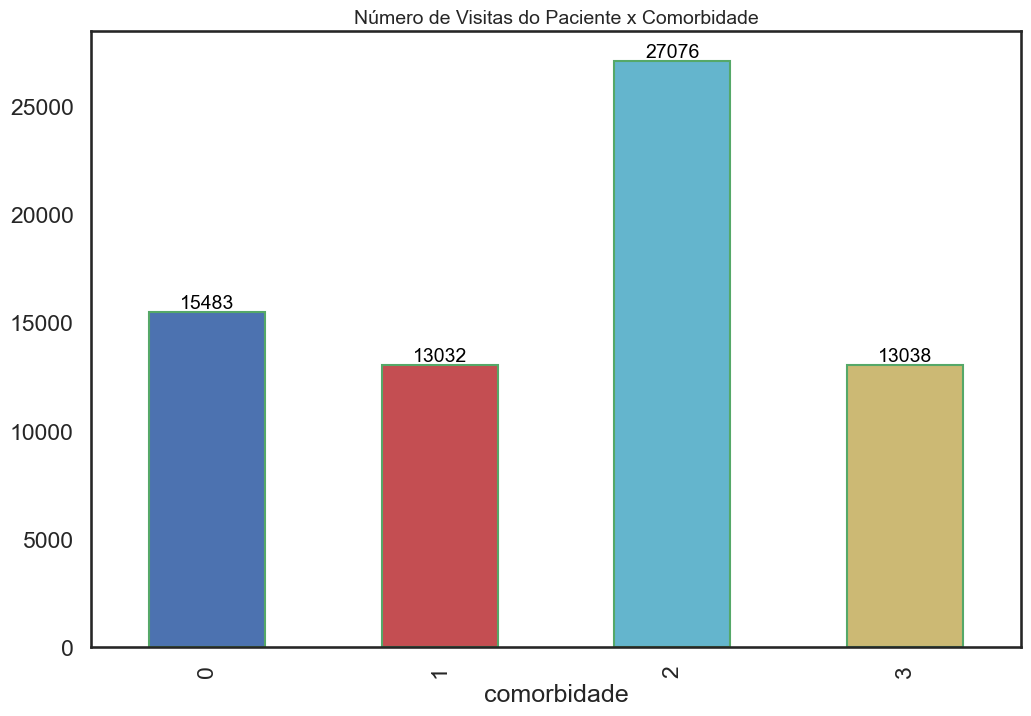

In [21]:
# Vamos remover as linhas do background
sns.set(style = "white", context = "talk")

# Cria o gráfico
fig = num_visitas_comorb.plot(kind = 'bar',
                                   figsize = (12,8), 
                                   width = 0.5,
                                   edgecolor = 'g', 
                                   color = ['b','r','c','y'],
                                   rot = 90)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.25, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)
plt.show()

>Pacientes com comorbidade tem o maior número de visitas.

#### 8- Proporção de Readmissões Pelo Número de Visitas Antes da Alta

> Procuramos construir uma análise para verificar se o número de readmissões está relacionado com o número de visitas, pois entendemos que quanto mais um paciente recebe visitas, mais ele precisa de cuidados. Do contrário, se o mesmo recebe poucas, pode significar que ele está em boas condições de receber alta.

In [25]:
# Criando uma tabela cruzada
perc_visitas_read = pd.crosstab(dados['number_inpatient'], dados['readmitted'], normalize = 'index') * 100
perc_visitas_read

readmitted,Não readmitido,Readimitido
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


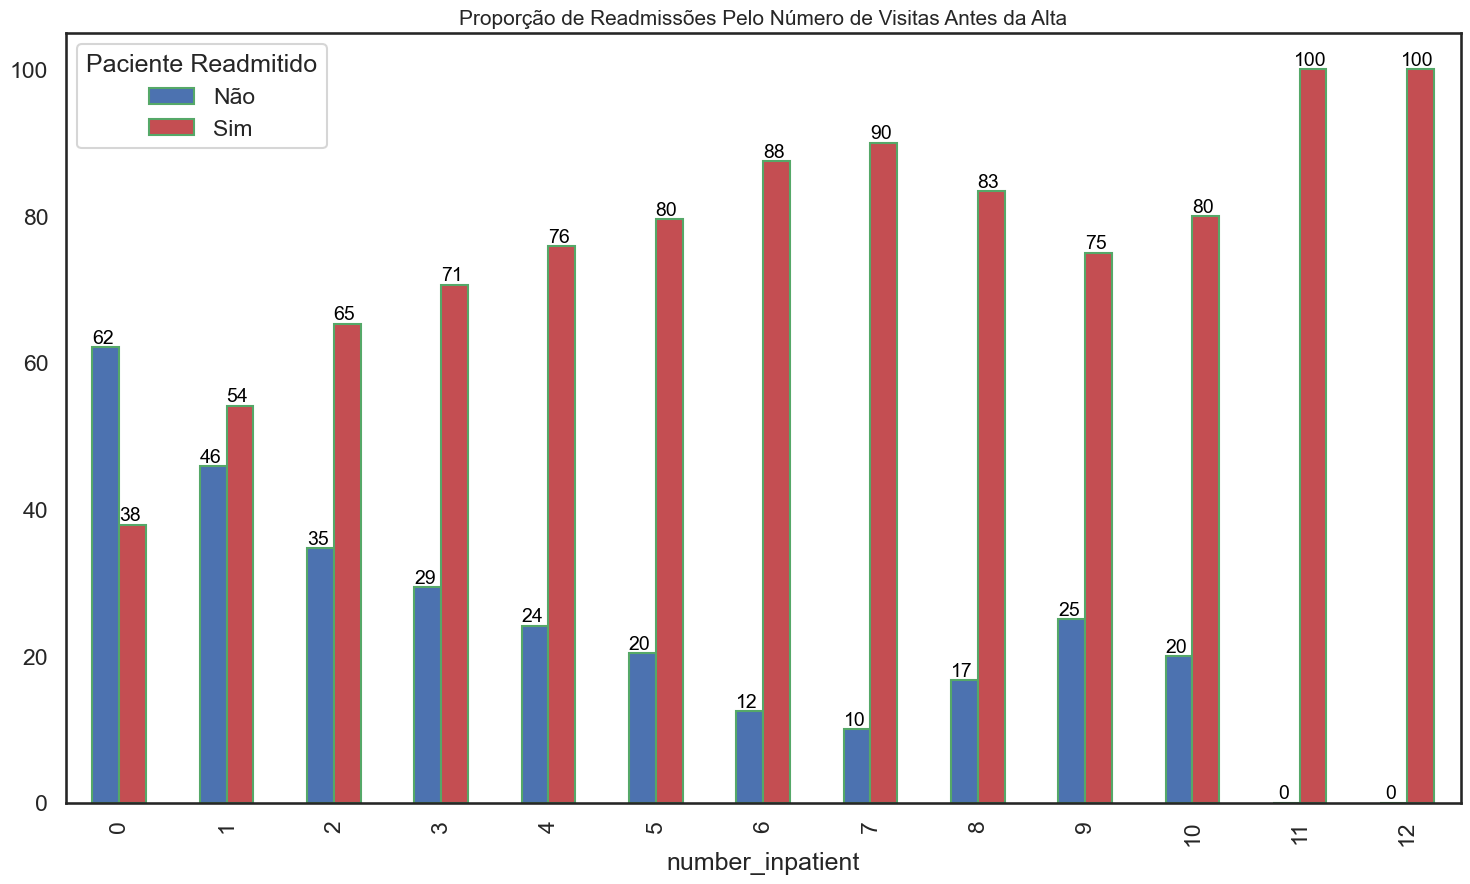

In [31]:
# Gráfico de barras
fig = perc_visitas_read.plot(kind = 'bar', figsize = (18,10), width = 0.5, edgecolor = 'g', color = ['b','r'])

# Representa os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.1, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize = 15)

# Legenda
fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))
plt.show()

> Quanto mais visitas o paciente recebeu antes da alta, maior foi o volume de readmissões. Ou seja, quanto mais visitas o paciente recebe, maiores as chances de readmissão.

#### 9- Análise com Gráficos Estatísticos

>O objetivo desses gráficos é resumir as informações e nada melhor que apresentar tais informações de forma gráfica.

<AxesSubplot:xlabel='Número de medicamentos consumidos', ylabel='Density'>

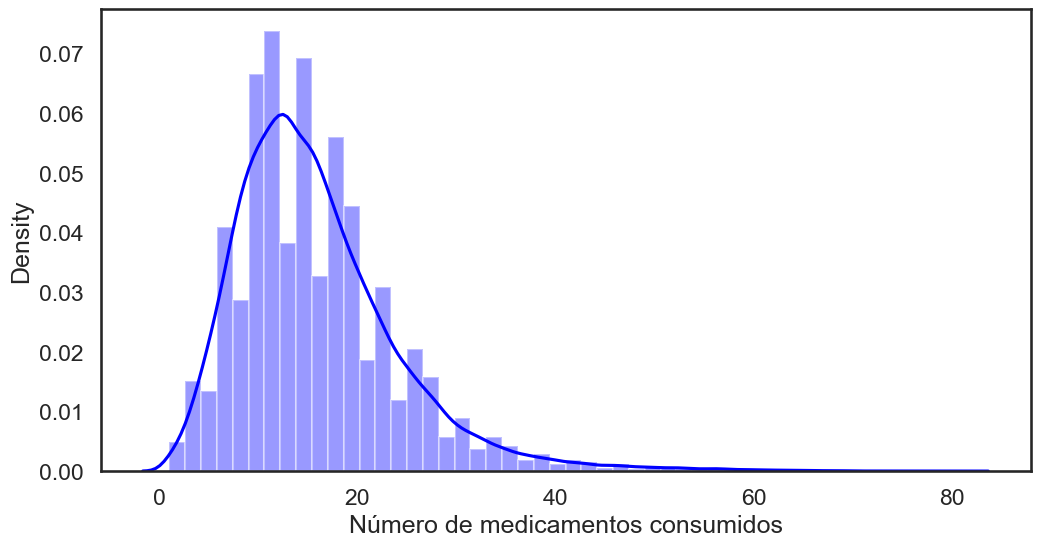

In [32]:
# Verificando a distribuição do número de medicamentos consumidos
# Usamos o distplot que é um gráfico que mescla densidade e histograma
plt.figure(figsize= (12, 6))
sns.distplot(dados['num_medications'], hist = True, color = 'Blue', axlabel = 'Número de medicamentos consumidos')

<AxesSubplot:xlabel='num_medications'>

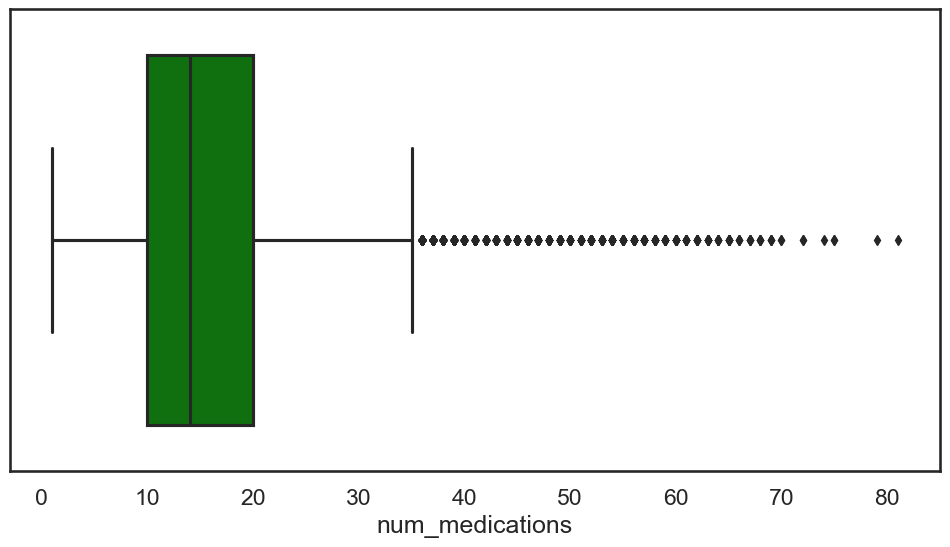

In [35]:
# Verificando a mesma distribuição com bloxplot
plt.figure(figsize = (12,6))
sns.boxplot(dados['num_medications'], color = 'Green')

In [33]:
# Resumo estatístico
dados['num_medications'].describe()

count    68629.000000
mean        15.806481
std          8.289790
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

#### Stacked Histogramas

>Este é um gráfico mais técnico e pouco usual para os tomadores de decisão, seu uso consiste na utilização de 2 histogramas para 2 variáveis, separando pela cor.

<AxesSubplot:ylabel='Frequency'>

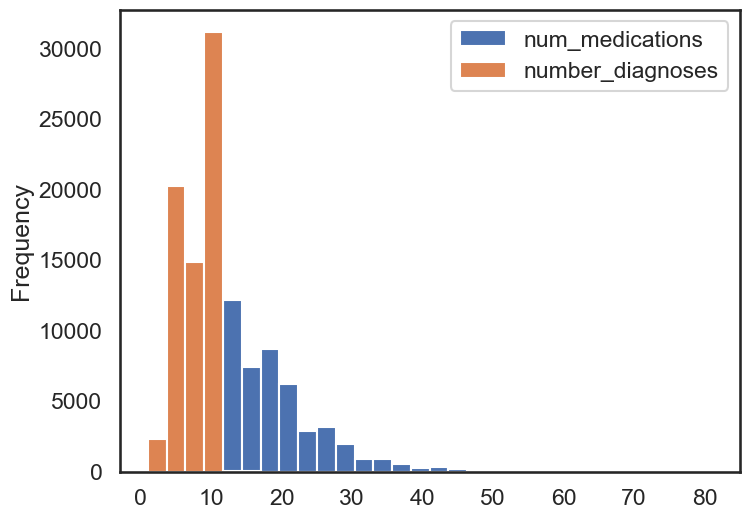

In [36]:
dados[["num_medications", "number_diagnoses"]].plot(bins = 30, kind = "hist", figsize = (8,6))

#### Histogramas da Mesma Variável Por Diferentes Classes

array([<AxesSubplot:title={'center':'Não readmitido'}>,
       <AxesSubplot:title={'center':'Readimitido'}>], dtype=object)

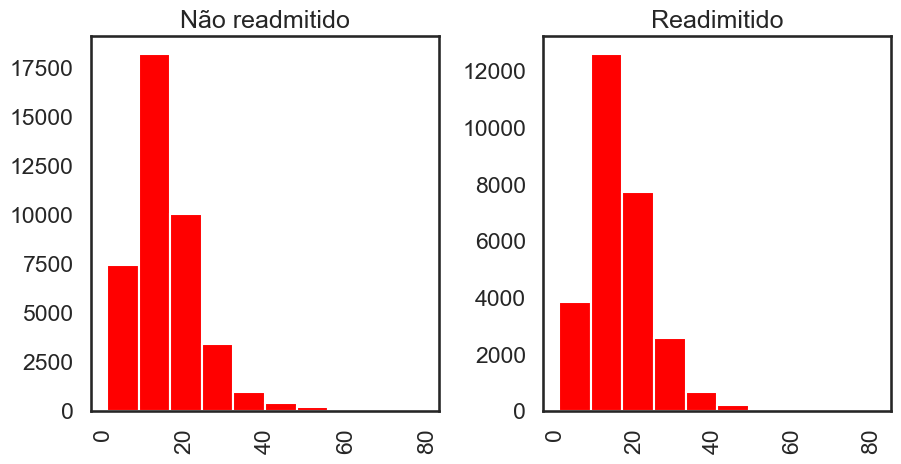

In [37]:
dados[["num_medications"]].hist(by = dados.readmitted, figsize = (10,5), color = 'Red')

### EXTRA: Comportamento do Paciente Por Procedimentos Clínicos

> Gráfico 3D avançado apenas para demonstração

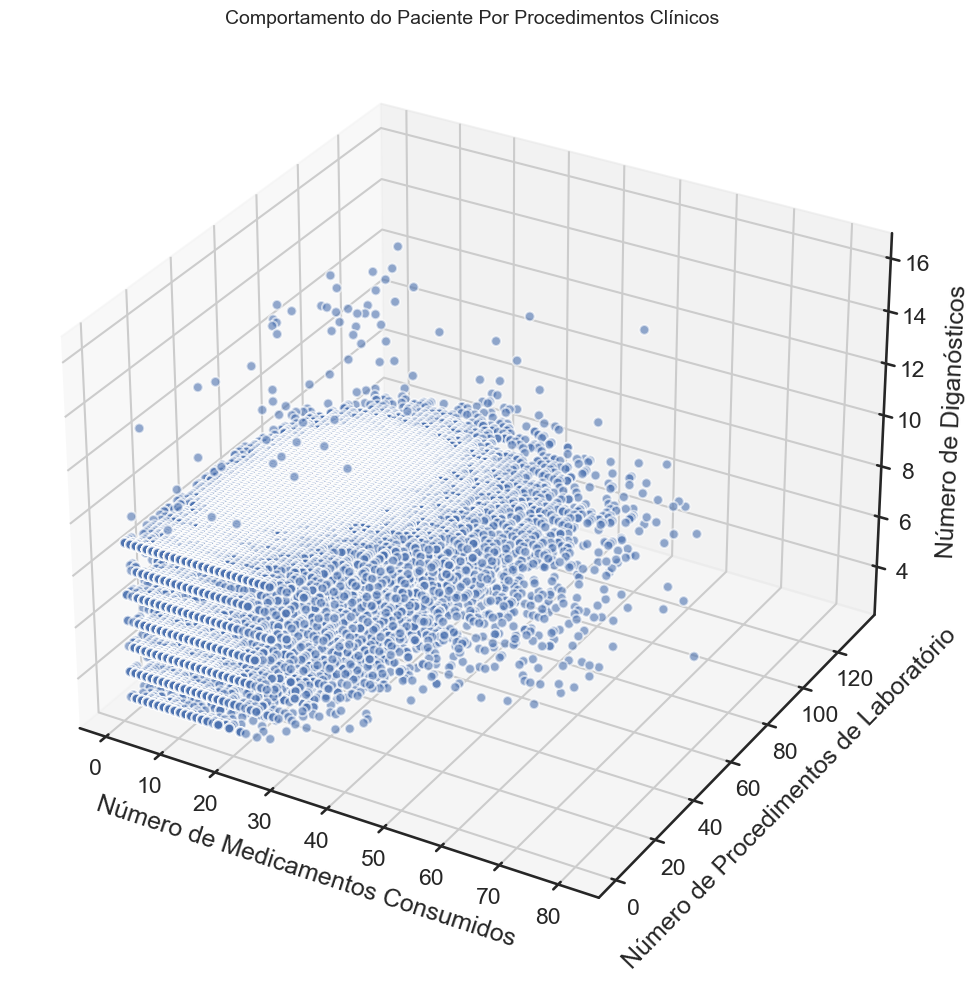

In [39]:
# Tamanho da figura
fig = plt.figure(figsize = (14, 12))

# Subplots com prejoção 3D
ax = fig.add_subplot(111, projection = '3d')

# Dimensões
xs = dados['num_medications']
ys = dados['num_lab_procedures']
zs = dados['number_diagnoses']

# Gráfico de pontos (scatterplot) com projeção 3D definida em 'ax'
ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolors = 'w')

# Labels
ax.set_xlabel('\nNúmero de Medicamentos Consumidos')
ax.set_ylabel('\nNúmero de Procedimentos de Laboratório')
ax.set_zlabel('\nNúmero de Diganósticos')

# Título
plt.title("Comportamento do Paciente Por Procedimentos Clínicos", fontsize = 14)
plt.show()

# Fim